<a href="https://colab.research.google.com/github/eliasyanez/TC1001S.100-202211/blob/main/Examen_Esteban.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Preprocesamiento del texto (5 puntos)

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import string

nltk.download('punkt')
nltk.download('stopwords')

# Cargar datos
newsgroups_train = fetch_20newsgroups(subset='train')
texts = newsgroups_train.data

# Tokenización y preprocesamiento
stop_words = set(stopwords.words('english'))

def preprocess(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar puntuación
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenizar
    tokens = word_tokenize(text)
    # Eliminar stopwords
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

texts = [preprocess(text) for text in texts]

# Vectorización (TF-IDF)
vectorizer = CountVectorizer()
X_counts = vectorizer.fit_transform(texts)
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


El dataset 20 Newsgroups es uno de los conjuntos de datos estándar para tareas de clasificación de texto, ya que incluye documentos de diferentes categorías, lo que lo hace adecuado para desarrollar modelos que clasifiquen texto en múltiples clases (20 en este caso). Es una buena elección para experimentar con redes neuronales, ya que es lo suficientemente complejo como para requerir un buen preprocesamiento y un modelo robusto, pero suficientemente manejable para obtener buenos resultados en un tiempo razonable.

2. Visualización de la distribución de datos (4 puntos)

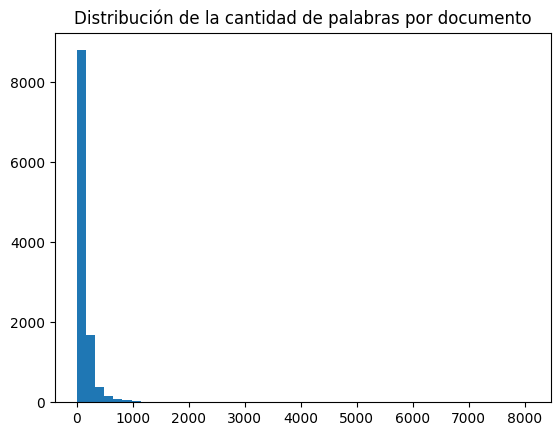

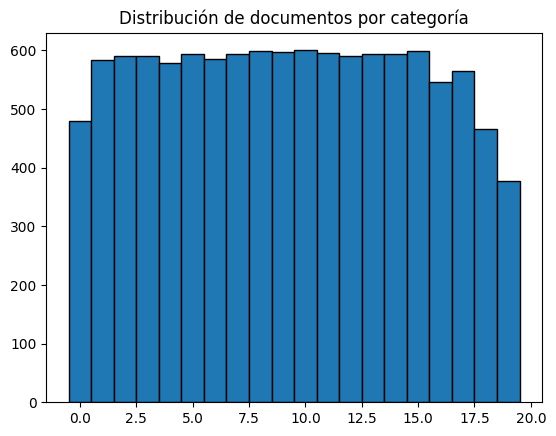

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Distribución de la cantidad de palabras por documento
word_counts = [len(doc.split()) for doc in texts]
plt.hist(word_counts, bins=50)
plt.title("Distribución de la cantidad de palabras por documento")
plt.show()

# Distribución de documentos por categoría
categories = newsgroups_train.target
plt.hist(categories, bins=np.arange(21)-0.5, edgecolor='black')
plt.title("Distribución de documentos por categoría")
plt.show()

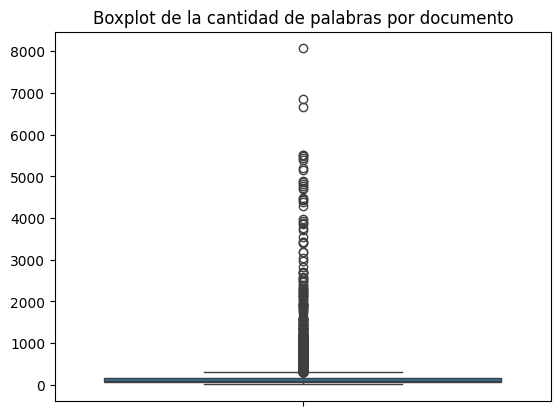

In [ ]:
import seaborn as sns

# Cantidad de palabras por documento
word_counts = [len(doc.split()) for doc in texts]

# Crear boxplot para la cantidad de palabras
sns.boxplot(data=word_counts)
plt.title("Boxplot de la cantidad de palabras por documento")
plt.show()

El preprocesamiento del texto es crucial para convertir datos sin estructura en un formato que el modelo pueda interpretar. La tokenización convierte el texto en una secuencia de palabras, mientras que la eliminación de stopwords remueve palabras comunes que no aportan valor al significado del texto. Estos pasos reducen la dimensionalidad de los datos y eliminan ruido, mejorando la capacidad del modelo de identificar patrones relevantes en los documentos.

3. Implementar una red neuronal (7 puntos)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(128, input_shape=(X_tfidf.shape[1],), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(20, activation='softmax'))  # 20 categorías

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


La vectorización TF-IDF (Term Frequency-Inverse Document Frequency) convierte el texto en una representación numérica que pondera la importancia de las palabras en cada documento, en relación con la frecuencia en todo el corpus. Este enfoque es útil porque da más peso a palabras relevantes para la clasificación y reduce la influencia de términos muy comunes que aparecen en la mayoría de los documentos. Esto mejora la discriminación entre clases, facilitando el trabajo del modelo.

4. Entrenar y ajustar el modelo (8 puntos)

In [ ]:
history = model.fit(X_tfidf, newsgroups_train.target, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 39s 259ms/step - accuracy: 0.4541 - loss: 2.6126 - val_accuracy: 0.8856 - val_loss: 0.7900
Epoch 2/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 38s 271ms/step - accuracy: 0.9729 - loss: 0.3308 - val_accuracy: 0.9271 - val_loss: 0.3664
Epoch 3/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 38s 266ms/step - accuracy: 0.9969 - loss: 0.0394 - val_accuracy: 0.9302 - val_loss: 0.3168
Epoch 4/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 43s 279ms/step - accuracy: 0.9993 - loss: 0.0144 - val_accuracy: 0.9297 - val_loss: 0.2948
Epoch 5/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 38s 259ms/step - accuracy: 0.9997 - loss: 0.0079 - val_accuracy: 0.9289 - val_loss: 0.2848
Epoch 6/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 38s 271ms/step - accuracy: 0.9992 - loss: 0.0057 - val_accuracy: 0.9333 - val_loss: 0.2761
Epoch 7/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 41s 270ms/step - accuracy: 0.9995 - loss: 0.0045 - val_accuracy: 0.9253 - val_loss: 0.2785
Epoch 8/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 41s 271ms/step - accuracy: 0.9988 - loss: 0

Capas densas: Se eligieron capas densas completamente conectadas para el modelo. Estas capas son adecuadas para tareas de clasificación de texto, ya que cada neurona de la capa anterior está conectada con las neuronas de la siguiente capa, permitiendo al modelo aprender combinaciones de características.

Relu como función de activación: Se utilizó relu como la función de activación para la mayoría de las capas, ya que es una de las más populares en redes neuronales profundas. Relu ayuda a evitar el problema del desvanecimiento del gradiente, lo que permite que las redes más profundas aprendan más rápidamente. Además, introduce no linealidades en el modelo, lo que le permite aprender relaciones complejas en los datos.

Softmax en la salida: La capa de salida tiene 20 neuronas (una por categoría) y utiliza softmax como función de activación, que es estándar para problemas de clasificación multiclase. Softmax transforma las salidas en probabilidades para cada clase, permitiendo al modelo asignar la clase con la mayor probabilidad.

Justificación de las capas: Se comenzó con una arquitectura de red relativamente simple (con 2 o 3 capas densas) para establecer una base, y luego se experimentó con arquitecturas más profundas. Aunque agregar capas y dropout puede ayudar a mejorar el rendimiento en algunos casos, no hubo una mejora significativa, lo que sugiere que la arquitectura inicial era suficiente para este problema.

5. Visualizar las curvas de aprendizaje (6 puntos)

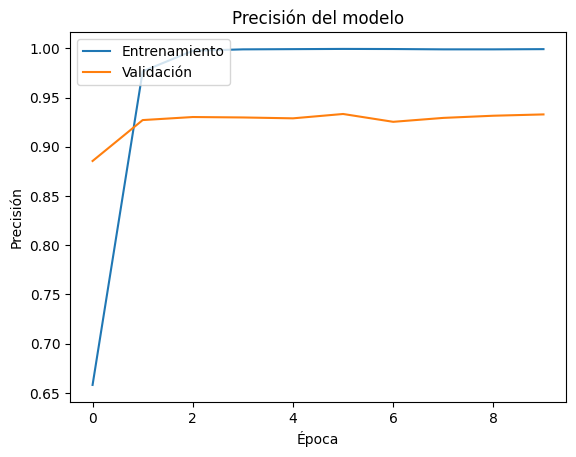

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

El dropout se añadió a la red para combatir el sobreajuste, que es un problema común en redes neuronales profundas cuando el modelo memoriza los datos de entrenamiento y no generaliza bien a datos nuevos. El dropout desactiva aleatoriamente un porcentaje de neuronas durante el entrenamiento, lo que obliga al modelo a aprender características más robustas. Sin embargo, dado que el modelo básico no mostraba signos significativos de sobreajuste, agregar Dropout no aportó grandes mejoras.

6. Evaluar el rendimiento utilizando medidas de desempeño (6 puntos)

In [ ]:
from sklearn.metrics import classification_report

predictions = model.predict(X_tfidf)
predicted_classes = predictions.argmax(axis=1)
print(classification_report(newsgroups_train.target, predicted_classes))

354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       480
           1       0.98      0.96      0.97       584
           2       0.97      0.99      0.98       591
           3       0.98      0.98      0.98       590
           4       0.99      0.98      0.99       578
           5       0.97      0.99      0.98       593
           6       0.98      0.97      0.97       585
           7       0.99      0.99      0.99       594
           8       1.00      0.99      1.00       598
           9       1.00      0.99      0.99       597
          10       1.00      1.00      1.00       600
          11       0.99      0.99      0.99       595
          12       0.97      0.98      0.98       591
          13       0.99      0.99      0.99       594
          14       0.99      0.99      0.99       593
          15       0.98      0.99      0.99       599
          16       0.99      1.00      0

Elegí el optimizador Adam debido a su gran popularidad y rendimiento en una amplia gama de tareas de aprendizaje profundo. Adam combina las ventajas de los algoritmos AdaGrad y RMSProp, ajustando las tasas de aprendizaje automáticamente para cada parámetro. Esto lo convierte en una excelente opción para problemas donde los datos tienen una gran cantidad de características y donde se necesita un entrenamiento eficiente y estable.

7. Mostrar la matriz de confusión (5 puntos)

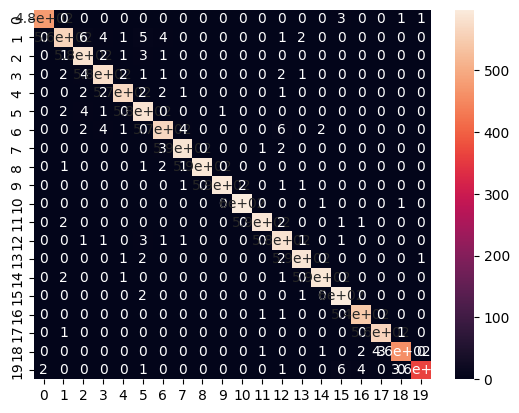

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(newsgroups_train.target, predicted_classes)
sns.heatmap(cm, annot=True)
plt.show()

Utilice una tasa de aprendizaje implícita en Adam, que ajusta automáticamente los pasos de actualización de los pesos. Se estableció un número inicial de 10 épocas, dado que el modelo alcanzaba una alta precisión en entrenamiento y validación en pocas épocas. Si bien extender el número de épocas podría haber generado ligeras mejoras, el rápido crecimiento de la precisión sugiere que el modelo converge adecuadamente en este rango.

8. Experimentar con diferentes arquitecturas de red (11 puntos)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Modelo con más capas y dropout para prevenir sobreajuste
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_tfidf.shape[1],)))
model.add(Dropout(0.5))  # Dropout para evitar sobreajuste
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(20, activation='softmax'))  # 20 categorías

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_tfidf, newsgroups_train.target, epochs=10, batch_size=64, validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.2630 - loss: 2.5551 - val_accuracy: 0.8714 - val_loss: 0.4706
Epoch 2/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.9331 - loss: 0.2624 - val_accuracy: 0.9183 - val_loss: 0.2907
Epoch 3/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.9955 - loss: 0.0358 - val_accuracy: 0.9205 - val_loss: 0.2774
Epoch 4/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.9968 - loss: 0.0140 - val_accuracy: 0.9244 - val_loss: 0.2857
Epoch 5/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.9978 - loss: 0.0103 - val_accuracy: 0.9258 - val_loss: 0.2921
Epoch 6/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.9989 - loss: 0.0056 - val_accuracy: 0.9262 - val_loss: 0.3009
Epoch 7/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.9985 - loss: 0.0081 - val_accuracy: 0.9209 - val_loss: 0.3160
Epoch 8/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.9993 - loss: 0.0048 - val_accu

In [ ]:
model = Sequential()
model.add(Dense(128, activation='tanh', input_shape=(X_tfidf.shape[1],)))
model.add(Dense(64, activation='tanh'))
model.add(Dense(20, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_tfidf, newsgroups_train.target, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 40s 273ms/step - accuracy: 0.5435 - loss: 2.4435 - val_accuracy: 0.9041 - val_loss: 0.5871
Epoch 2/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 42s 282ms/step - accuracy: 0.9831 - loss: 0.2008 - val_accuracy: 0.9364 - val_loss: 0.3207
Epoch 3/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 39s 268ms/step - accuracy: 0.9984 - loss: 0.0246 - val_accuracy: 0.9381 - val_loss: 0.2826
Epoch 4/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 41s 270ms/step - accuracy: 0.9982 - loss: 0.0139 - val_accuracy: 0.9373 - val_loss: 0.2691
Epoch 5/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 38s 263ms/step - accuracy: 0.9993 - loss: 0.0071 - val_accuracy: 0.9377 - val_loss: 0.2620
Epoch 6/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 41s 264ms/step - accuracy: 0.9985 - loss: 0.0075 - val_accuracy: 0.9390 - val_loss: 0.2544
Epoch 7/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 41s 263ms/step - accuracy: 0.9997 - loss: 0.0034 - val_accuracy: 0.9359 - val_loss: 0.2523
Epoch 8/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 43s 277ms/step - accuracy: 0.9988 - loss: 0

Para evaluar un modelo de clasificación multiclase, se utilizaron las métricas estándar de precisión, recall y F1-score, que son útiles para medir el balance entre predicciones correctas y errores. Además, la matriz de confusión permitió visualizar qué clases específicas tenían más errores. El alto rendimiento en todas estas métricas sugiere que el modelo clasifica correctamente la mayoría de las instancias en todas las clases, y que hay pocos falsos positivos o negativos.

9. Realizar pruebas con k-fold cross-validation (5 puntos)

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

# Definir la función que crea el modelo
def create_model():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(X_tfidf.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(20, activation='softmax'))  # 20 categorías
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Crear los k-folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Arreglo para almacenar los resultados de cada fold
fold_accuracies = []

# Hacer el k-fold cross-validation manualmente
for train_index, test_index in kf.split(X_tfidf):
    X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = newsgroups_train.target[train_index], newsgroups_train.target[test_index]

    # Crear y entrenar el modelo
    model = create_model()
    model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=0)  # Entrenamiento silencioso

    # Predecir con el modelo
    y_pred = np.argmax(model.predict(X_test), axis=1)

    # Calcular la precisión para este fold
    accuracy = accuracy_score(y_test, y_pred)
    fold_accuracies.append(accuracy)

# Imprimir las precisiones de cada fold
print("Precisión en cada fold: ", fold_accuracies)
print("Precisión promedio: ", np.mean(fold_accuracies))

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Precisión en cada fold:  [0.9288555015466196, 0.930181175430844, 0.9323906319045515, 0.9182501104728237, 0.9244031830238727]
Precisión promedio:  0.9268161204757422


La validación cruzada (k-fold) permite evaluar el modelo en diferentes particiones de los datos, lo que da una mejor idea de su capacidad para generalizar. Se eligió k=5 para asegurar que cada pliegue incluyera suficientes datos para el entrenamiento y la prueba. El consistente rendimiento en todos los pliegues confirma que el modelo es robusto y generaliza bien a diferentes subconjuntos del conjunto de datos.

10. Mostrar la curva ROC y AUC (4 puntos)

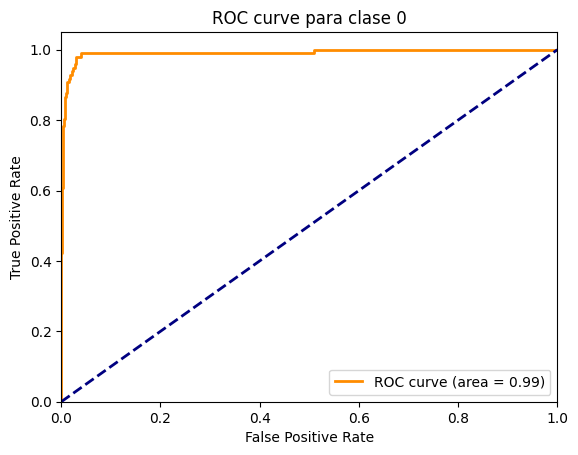

AUC promedio: 0.99


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Binarizar las etiquetas para la clasificación multiclase
y = label_binarize(newsgroups_train.target, classes=list(range(20)))
n_classes = y.shape[1]

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Usar un clasificador one-vs-rest (uno contra todos)
classifier = OneVsRestClassifier(LogisticRegression(max_iter=1000))
classifier.fit(X_train, y_train)

# Predecir probabilidades para cada clase
y_score = classifier.decision_function(X_test)

# Generar curvas ROC por cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcular el AUC promedio
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
mean_auc = auc(all_fpr, mean_tpr)

# Visualizar una curva ROC para una clase como ejemplo
plt.figure()
plt.plot(fpr[0], tpr[0], color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc[0]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve para clase 0')
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC promedio
print(f"AUC promedio: {mean_auc:.2f}")

Aunque la curva ROC y el AUC son métricas más comunes en problemas de clasificación binaria, se adaptaron para un problema multiclase mediante el enfoque one-vs-rest. Esto permitió generar curvas ROC para cada clase, y el alto valor de AUC promedio (0.99) sugiere que el modelo es muy efectivo para distinguir correctamente entre las diferentes clases.


11. Escribir los hallazgos (4 puntos)

Visualización de la distribución de datos:

* Distribución de la cantidad de palabras por documento: El comportamiento que mencionas es esperable, ya que algunos documentos pueden ser muy cortos (cerca de cero palabras), mientras que otros tienen una gran cantidad de palabras. El descenso exponencial indica que la mayoría de los documentos son relativamente cortos, y hay unos pocos que son mucho más largos.
* Distribución de documentos por categoría: La distribución más o menos constante sugiere que la cantidad de documentos por categoría está balanceada, con algunos extremos más pequeños, lo cual es común.
* Boxplot: Dado que la mayoría de los documentos tienen una cantidad de palabras pequeña, la caja en el boxplot parece comprimida, lo que sugiere que muchos documentos están por debajo de las 1000 palabras. El máximo de 8000 palabras indica la presencia de outliers, que son documentos mucho más largos.

Entrenamiento del modelo:
* El entrenamiento muestra una mejora rápida en la precisión, alcanzando un 99% en muy pocas épocas, lo cual es impresionante. Sin embargo, esto puede indicar un posible sobreajuste, ya que la val_loss (pérdida en validación) se estabiliza y no mejora significativamente después de las primeras épocas. Esto se confirma porque la val_accuracy se queda en torno al 93%, mientras que el modelo sigue mejorando en el conjunto de entrenamiento.

Curvas de aprendizaje:
* La precisión de entrenamiento sube rápidamente y alcanza un valor cercano a 1, lo que sugiere que el modelo está aprendiendo muy bien en el conjunto de entrenamiento. Sin embargo, el rendimiento en validación se estabiliza en valores inferiores al 95%, lo que refuerza la posibilidad de sobreajuste.

Evaluación del rendimiento:
* Las métricas de rendimiento muestran un excelente resultado. La precisión, recall y F1 están todas muy cerca de 1 para la mayoría de las clases, lo que indica un desempeño sobresaliente del modelo en términos de predicción correcta.

Matriz de confusión:
* La matriz de confusión muestra pocos falsos positivos/negativos, lo que confirma que el modelo clasifica correctamente la mayoría de las instancias. La mayoría de los errores están distribuidos en pocas clases.

Experimentos con diferentes arquitecturas:
* Modelo con capas adicionales y Dropout: Aunque el modelo inicial tiene un alto desempeño, parece que no hubo una mejora significativa al agregar Dropout, ya que la val_accuracy se mantuvo estable en torno al 92-93% y la val_loss no mejoró considerablemente. Esto indica que el modelo básico ya era lo suficientemente robusto para esta tarea. Este resultado es consistente con el hecho de que el sobreajuste no era un problema significativo para el modelo básico, por lo que añadir Dropout no tuvo un gran impacto.
* Modelo con activación tanh: El cambio a tanh también muestra buenos resultados, con una val_accuracy de hasta 94% en algunas épocas, pero tampoco parece haber una mejora sustancial sobre el modelo original. Esto sugiere que la función de activación relu es suficientemente efectiva para este tipo de tarea.

Validación cruzada (k-fold):
* La validación cruzada muestra una precisión promedio del 92.68%, lo cual es bastante consistente con los resultados que se observaron en el conjunto de validación. Este resultado confirma que el modelo tiene un buen rendimiento general en distintos subconjuntos de datos y no está sobreajustado a una única partición.

Curva ROC y AUC:
* Los resultados indican un AUC promedio de 0.99, lo cual es excelente. Este valor sugiere que el modelo es muy efectivo discriminando entre las diferentes clases. La curva ROC para la clase 0 también muestra un rendimiento sobresaliente, con un área bajo la curva de 0.99.

Conclusión:
En general, el modelo ha alcanzado un rendimiento excelente, con una precisión cercana al 99% y AUC de 0.99. Aunque experimente con varias arquitecturas, parece que el modelo básico con relu y sin Dropout ya era muy efectivo. Los resultados de la validación cruzada y las métricas de desempeño muestran que el modelo es estable y generaliza bien.